#*Grab Datasets*

In [1]:
import pandas as pd
import numpy as np
!pip install uszipcode
from uszipcode import SearchEngine, SimpleZipcode 
from sklearn.preprocessing import MinMaxScaler
#Convert data to csv
zipdf = pd.read_csv("Zipcode.csv")
citydf = pd.read_csv("Grouped.csv")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 121 kB 57.3 MB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 


/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#*Cleaning Group Table*

In [105]:

citydf.loc[citydf['date'] == '2021-12-14','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-12-07','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-30','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-23','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-16','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-09','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-02','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-12-14','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-12-07','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-30','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-23','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-16','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-09','atleast_onedose'] = np.nan
citydf.loc[citydf['date'] == '2021-11-02','atleast_onedose'] = np.nan

In [104]:
citydf[citydf.date=='2021-11-02']

,date,city,age_group,population,atleast_onedose,fully_vaccinated,boosted,boosted_second,partially_vaccinated
88286,2021-11-02,Barnstable,12-15 Years,1725.0,1386.0,1199.0,NaN,NaN,187.0
88287,2021-11-02,Barnstable,16-19 Years,1727.0,1547.0,1372.0,NaN,NaN,175.0
88288,2021-11-02,Barnstable,20-29 Years,4924.0,4141.0,3631.0,NaN,NaN,510.0
88289,2021-11-02,Barnstable,30-49 Years,8943.0,9121.0,8137.0,NaN,NaN,984.0
88290,2021-11-02,Barnstable,50-64 Years,10997.0,9902.0,9035.0,NaN,NaN,867.0
...,...,...,...,...,...,...,...,...,...
90977,2021-11-02,Worcester,30-49 Years,48951.0,40308.0,35115.0,NaN,NaN,5193.0
90978,2021-11-02,Worcester,50-64 Years,32677.0,30789.0,27418.0,NaN,NaN,3371.0
90979,2021-11-02,Worcester,65-74 Years,14033.0,14819.0,13114.0,NaN,NaN,1705.0
90980,2021-11-02,Worcester,75+ Years,10204.0,10154.0,8933.0,NaN,NaN,1221.0


In [106]:

# Build individual Dataframe for six cities (Revere, Chelsea, Springfield, Everett, Newton, Wellesley)
six_city= citydf.copy()
Revere = six_city[six_city["city"]=="Revere"]
Chelsea = six_city[six_city["city"]=="Chelsea"]
Springfield = six_city[six_city["city"]=="Springfield"]
Everett = six_city[six_city["city"]=="Everett"]
Newton = six_city[six_city["city"]=="Newton"]
Wellesley = six_city[six_city["city"]=="Wellesley"]

# People in all age ranges in Revere
#Because our team is to analyze the vaccination situation for different age ranges, "all_age_Revere" is the data for people in all age ranges from Revere.
all_age_Revere = Revere[Revere["age_group"]=="Total"]

#Due to some data are missing, I use interpolate method to fill the empty data
#Because the number of vaccinations must in an increasing trend, we must split data in the same city and same age_group at first then we can use interpolate method.
all_age_Revere = all_age_Revere.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Revere
age0_Revere = Revere[Revere["age_group"]=="0-19 Years"]
age0_Revere = age0_Revere.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Revere
age20_Revere = Revere[Revere["age_group"]=="20-29 Years"]
age20_Revere = age20_Revere.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Revere
age30_Revere = Revere[Revere["age_group"]=="30-49 Years"]
age30_Revere = age30_Revere.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Revere
age50_Revere = Revere[Revere["age_group"]=="50-64 Years"]
age50_Revere = age50_Revere.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Revere
age65_Revere = Revere[Revere["age_group"]=="65-74 Years"]
age65_Revere = age65_Revere.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Revere
age75_Revere = Revere[Revere["age_group"]=="75+ Years"]
age75_Revere = age75_Revere.interpolate(method ='linear', limit_direction ='both')



# All age people in Chelsea
all_age_Chelsea = Chelsea[Chelsea["age_group"]=="Total"]
all_age_Chelsea = all_age_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Chelsea
age0_Chelsea = Chelsea[Chelsea["age_group"]=="0-19 Years"]
age0_Chelsea = age0_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Chelsea
age20_Chelsea = Chelsea[Chelsea["age_group"]=="20-29 Years"]
age20_Chelsea = age20_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Chelsea
age30_Chelsea = Chelsea[Chelsea["age_group"]=="30-49 Years"]
age30_Chelsea = age30_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Chelsea
age50_Chelsea = Chelsea[Chelsea["age_group"]=="50-64 Years"]
age50_Chelsea = age50_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Chelsea
age65_Chelsea = Chelsea[Chelsea["age_group"]=="65-74 Years"]
age65_Chelsea = age65_Chelsea.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Chelsea
age75_Chelsea = Chelsea[Chelsea["age_group"]=="75+ Years"]
age75_Chelsea = age75_Chelsea.interpolate(method ='linear', limit_direction ='both')


# All age people in Springfield
all_age_Springfield = Springfield[Springfield["age_group"]=="Total"]
all_age_Springfield = all_age_Springfield.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Springfield
age0_Springfield = Springfield[Springfield["age_group"]=="0-19 Years"]
age0_Springfield = age0_Springfield.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Springfield
age20_Springfield = Springfield[Springfield["age_group"]=="20-29 Years"]
age20_Springfield = age20_Springfield.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Springfield
age30_Springfield = Springfield[Springfield["age_group"]=="30-49 Years"]
age30_Springfield = age30_Springfield.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Springfield
age50_Springfield = Springfield[Springfield["age_group"]=="50-64 Years"]
age50_Springfield = age50_Springfield.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Springfield
age65_Springfield = Springfield[Springfield["age_group"]=="65-74 Years"]
age65_Springfield = age65_Springfield.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Springfield
age75_Springfield = Springfield[Springfield["age_group"]=="75+ Years"]
age75_Springfield = age75_Springfield.interpolate(method ='linear', limit_direction ='both')



# All age people in Everett
all_age_Everett = Everett[Everett["age_group"]=="Total"]
all_age_Everett = all_age_Everett.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Everett
age0_Everett = Everett[Everett["age_group"]=="0-19 Years"]
age0_Everett = age0_Everett.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Everett
age20_Everett = Everett[Everett["age_group"]=="20-29 Years"]
age20_Everett = age20_Everett.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Everett
age30_Everett = Everett[Everett["age_group"]=="30-49 Years"]
age30_Everett = age30_Everett.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Everett
age50_Everett = Everett[Everett["age_group"]=="50-64 Years"]
age50_Everett = age50_Everett.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Everett
age65_Everett = Everett[Everett["age_group"]=="65-74 Years"]
age65_Everett = age65_Everett.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Everett
age75_Everett = Everett[Everett["age_group"]=="75+ Years"]
age75_Everett = age75_Everett.interpolate(method ='linear', limit_direction ='both')



# All age people in Newton
all_age_Newton = Newton[Newton["age_group"]=="Total"]
all_age_Newton = all_age_Newton.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Newton
age0_Newton = Newton[Newton["age_group"]=="0-19 Years"]
age0_Newton = age0_Newton.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Newton
age20_Newton = Newton[Newton["age_group"]=="20-29 Years"]
age20_Newton = age20_Newton.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Newton
age30_Newton = Newton[Newton["age_group"]=="30-49 Years"]
age30_Newton = age30_Newton.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Newton
age50_Newton = Newton[Newton["age_group"]=="50-64 Years"]
age50_Newton = age50_Newton.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Newton
age65_Newton = Newton[Newton["age_group"]=="65-74 Years"]
age65_Newton = age65_Newton.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Newton
age75_Newton = Newton[Newton["age_group"]=="75+ Years"]
age75_Newton = age75_Newton.interpolate(method ='linear', limit_direction ='both')


# All age people in Wellesley
all_age_Wellesley = Wellesley[Wellesley["age_group"]=="Total"]
all_age_Wellesley = all_age_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 0-19 Years age people in Wellesley
age0_Wellesley = Wellesley[Wellesley["age_group"]=="0-19 Years"]
age0_Wellesley = age0_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 20-29 Years Years age people in Wellesley
age20_Wellesley = Wellesley[Wellesley["age_group"]=="20-29 Years"]
age20_Wellesley = age20_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 30-49 Years age people in Wellesley
age30_Wellesley = Wellesley[Wellesley["age_group"]=="30-49 Years"]
age30_Wellesley = age30_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 50-64 Years age people in Wellesley
age50_Wellesley = Wellesley[Wellesley["age_group"]=="50-64 Years"]
age50_Wellesley = age50_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 65-74 Years age people in Wellesley
age65_Wellesley = Wellesley[Wellesley["age_group"]=="65-74 Years"]
age65_Wellesley = age65_Wellesley.interpolate(method ='linear', limit_direction ='both')

# 75+ Years age people in Wellesley
age75_Wellesley = Wellesley[Wellesley["age_group"]=="75+ Years"]
age75_Wellesley = age75_Wellesley.interpolate(method ='linear', limit_direction ='both')




#Combine all ages range data into one Dataframe for four cities
Everett_complete = pd.concat([age75_Everett, age65_Everett, age50_Everett, age30_Everett, age20_Everett, age0_Everett, all_age_Everett])
Springfield_complete = pd.concat([age75_Springfield, age65_Springfield, age50_Springfield, age30_Springfield, age20_Springfield, age0_Springfield, all_age_Springfield])
Chelsea_complete = pd.concat([age75_Chelsea, age65_Chelsea, age50_Chelsea, age30_Chelsea, age20_Chelsea, age0_Chelsea, all_age_Chelsea])
Revere_complete = pd.concat([age75_Revere, age65_Revere, age50_Revere, age30_Revere, age20_Revere, age0_Revere, all_age_Revere])
Newton_complete = pd.concat([age75_Newton, age65_Newton, age50_Newton, age30_Newton, age20_Newton, age0_Newton, all_age_Newton])
Wellesley_complete = pd.concat([age75_Wellesley, age65_Wellesley, age50_Wellesley, age30_Wellesley, age20_Wellesley, age0_Wellesley, all_age_Wellesley])


#*Normalize the Data*

In [3]:
Everett_complete = normalize(Everett_complete)
Springfield_complete = normalize(Springfield_complete)
Chelsea_complete = normalize(Chelsea_complete)
Revere_complete = normalize(Revere_complete)
Newton_complete = normalize(Newton_complete)
Wellesley_complete = normalize(Wellesley_complete)

In [73]:
Newton_complete[Newton_complete.date=='2021-12-14']


,date,city,age_group,population,atleast_onedose,fully_vaccinated,boosted,boosted_second,partially_vaccinated


In [60]:
Everett_complete

,date,city,age_group,population,atleast_onedose,fully_vaccinated,boosted,boosted_second,partially_vaccinated
1258,2021-03-09,Everett,75+ Years,2237.0,1432.0,1033.0,929.0,445.0,399.0
3617,2021-03-16,Everett,75+ Years,2237.0,1507.0,1122.0,929.0,445.0,385.0
5976,2021-03-23,Everett,75+ Years,2237.0,1533.0,1203.0,929.0,445.0,330.0
8335,2021-03-30,Everett,75+ Years,2237.0,1570.0,1235.0,929.0,445.0,335.0
10694,2021-04-06,Everett,75+ Years,2237.0,1618.0,1280.0,929.0,445.0,338.0
...,...,...,...,...,...,...,...,...,...
233310,2022-09-20,Everett,Total,49074.0,44529.0,37398.0,17854.0,2750.0,6961.0
236680,2022-09-27,Everett,Total,49074.0,44615.0,37455.0,17960.0,2949.0,6961.0
240050,2022-10-04,Everett,Total,49074.0,44716.0,37524.0,18074.0,3200.0,6961.0
243420,2022-10-11,Everett,Total,49074.0,44808.0,37576.0,18184.0,3415.0,6961.0


#*Group Table Visualization*

In [11]:
all_age_Revere["date"].str[:7]

1931      2021-03
4290      2021-03
6649      2021-03
9008      2021-03
11367     2021-04
           ...   
234270    2022-09
237640    2022-09
241010    2022-10
244380    2022-10
247750    2022-10
Name: date, Length: 85, dtype: object

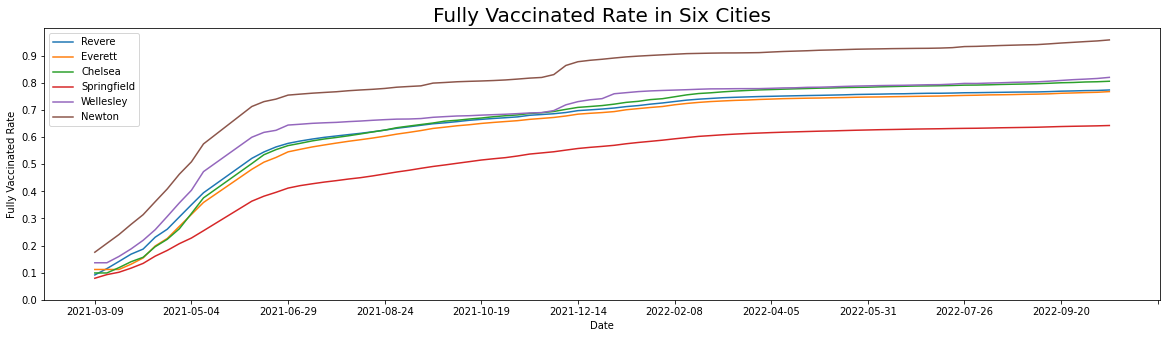

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)




plt.plot(all_age_Revere["date"],all_age_Revere["fully_vaccinated"]/all_age_Revere["population"].iat[-1], label='Revere')
plt.plot(all_age_Everett["date"],all_age_Everett["fully_vaccinated"]/all_age_Everett["population"].iat[-1], label='Everett')
plt.plot(all_age_Chelsea["date"],all_age_Chelsea["fully_vaccinated"]/all_age_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(all_age_Springfield["date"],all_age_Springfield["fully_vaccinated"]/all_age_Springfield["population"].iat[-1], label='Springfield')
plt.plot(all_age_Wellesley["date"],all_age_Wellesley["fully_vaccinated"]/all_age_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(all_age_Newton["date"],all_age_Newton["fully_vaccinated"]/all_age_Newton["population"].iat[-1], label='Newton')

plt.title('Fully Vaccinated Rate in Six Cities', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated Rate')

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()


In [ ]:
#Age 0 - 19
#Combine Age 20 - 29 and Age 30 - 49
#Age 50 - 65
#Combine Age 65 - 74 and Age 75+



In [ ]:
#Combine Age 20 - 29 and Age 30 - 49 in Wellesley
frames = [age20_Wellesley, age30_Wellesley]
result = pd.concat(frames)
age20_49Wellesley=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Wellesley["age_group"] = "20-49 Years"
age20_49Wellesley["city"] = "Wellesley"
age20_49Wellesley2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Wellesley['atleast_onedose']=age20_49Wellesley2['atleast_onedose']
age20_49Wellesley3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Wellesley['fully_vaccinated']=age20_49Wellesley3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Wellesley
frames = [age65_Wellesley, age75_Wellesley]
result = pd.concat(frames)
age65_75Wellesley=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Wellesley["age_group"] = "65-75+ Years"
age65_75Wellesley["city"] = "Wellesley"
age65_75Wellesley2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Wellesley['atleast_onedose']=age65_75Wellesley2['atleast_onedose']
age65_75Wellesley3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Wellesley['fully_vaccinated']=age65_75Wellesley3['fully_vaccinated']


#Combine Age 20 - 29 and Age 30 - 49 in Revere
frames = [age20_Revere, age30_Revere]
result = pd.concat(frames)
age20_49Revere=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Revere["age_group"] = "20-49 Years"
age20_49Revere["city"] = "Revere"
age20_49Revere2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Revere['atleast_onedose']=age20_49Revere2['atleast_onedose']
age20_49Revere3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Revere['fully_vaccinated']=age20_49Revere3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Revere
frames = [age65_Revere, age75_Revere]
result = pd.concat(frames)
age65_75Revere=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Revere["age_group"] = "65-75+ Years"
age65_75Revere["city"] = "Revere"
age65_75Revere2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Revere['atleast_onedose']=age65_75Revere2['atleast_onedose']
age65_75Revere3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Revere['fully_vaccinated']=age65_75Revere3['fully_vaccinated']



#Combine Age 20 - 29 and Age 30 - 49 in Chelsea
frames = [age20_Chelsea, age30_Chelsea]
result = pd.concat(frames)
age20_49Chelsea=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Chelsea["age_group"] = "20-49 Years"
age20_49Chelsea["city"] = "Chelsea"
age20_49Chelsea2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Chelsea['atleast_onedose']=age20_49Chelsea2['atleast_onedose']
age20_49Chelsea3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Chelsea['fully_vaccinated']=age20_49Chelsea3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Chelsea
frames = [age65_Chelsea, age75_Chelsea]
result = pd.concat(frames)
age65_75Chelsea=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Chelsea["age_group"] = "65-75+ Years"
age65_75Chelsea["city"] = "Chelsea"
age65_75Chelsea2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Chelsea['atleast_onedose']=age65_75Chelsea2['atleast_onedose']
age65_75Chelsea3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Chelsea['fully_vaccinated']=age65_75Chelsea3['fully_vaccinated']


#Combine Age 20 - 29 and Age 30 - 49 in Springfield
frames = [age20_Springfield, age30_Springfield]
result = pd.concat(frames)
age20_49Springfield=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Springfield["age_group"] = "20-49 Years"
age20_49Springfield["city"] = "Springfield"
age20_49Springfield2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Springfield['atleast_onedose']=age20_49Springfield2['atleast_onedose']
age20_49Springfield3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Springfield['fully_vaccinated']=age20_49Springfield3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Springfield
frames = [age65_Springfield, age75_Springfield]
result = pd.concat(frames)
age65_75Springfield=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Springfield["age_group"] = "65-75+ Years"
age65_75Springfield["city"] = "Springfield"
age65_75Springfield2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Springfield['atleast_onedose']=age65_75Springfield2['atleast_onedose']
age65_75Springfield3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Springfield['fully_vaccinated']=age65_75Springfield3['fully_vaccinated']

#Combine Age 20 - 29 and Age 30 - 49 in Newton
frames = [age20_Newton, age30_Newton]
result = pd.concat(frames)
age20_49Newton=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Newton["age_group"] = "20-49 Years"
age20_49Newton["city"] = "Newton"
age20_49Newton2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Newton['atleast_onedose']=age20_49Newton2['atleast_onedose']
age20_49Newton3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Newton['fully_vaccinated']=age20_49Newton3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Newton
frames = [age65_Newton, age75_Newton]
result = pd.concat(frames)
age65_75Newton=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Newton["age_group"] = "65-75+ Years"
age65_75Newton["city"] = "Newton"
age65_75Newton2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Newton['atleast_onedose']=age65_75Newton2['atleast_onedose']
age65_75Newton3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Newton['fully_vaccinated']=age65_75Newton3['fully_vaccinated']

#Combine Age 20 - 29 and Age 30 - 49 in Everett
frames = [age20_Everett, age30_Everett]
result = pd.concat(frames)
age20_49Everett=pd.DataFrame(result.groupby('date')['population'].sum())
age20_49Everett["age_group"] = "20-49 Years"
age20_49Everett["city"] = "Everett"
age20_49Everett2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age20_49Everett['atleast_onedose']=age20_49Everett2['atleast_onedose']
age20_49Everett3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age20_49Everett['fully_vaccinated']=age20_49Everett3['fully_vaccinated']

#Combine Age 65 - 74 and Age 75+ in Everett
frames = [age65_Everett, age75_Everett]
result = pd.concat(frames)
age65_75Everett=pd.DataFrame(result.groupby('date')['population'].sum())
age65_75Everett["age_group"] = "65-75+ Years"
age65_75Everett["city"] = "Everett"
age65_75Everett2=pd.DataFrame(result.groupby('date')['atleast_onedose'].sum())
age65_75Everett['atleast_onedose']=age65_75Everett2['atleast_onedose']
age65_75Everett3=pd.DataFrame(result.groupby('date')['fully_vaccinated'].sum())
age65_75Everett['fully_vaccinated']=age65_75Everett3['fully_vaccinated']


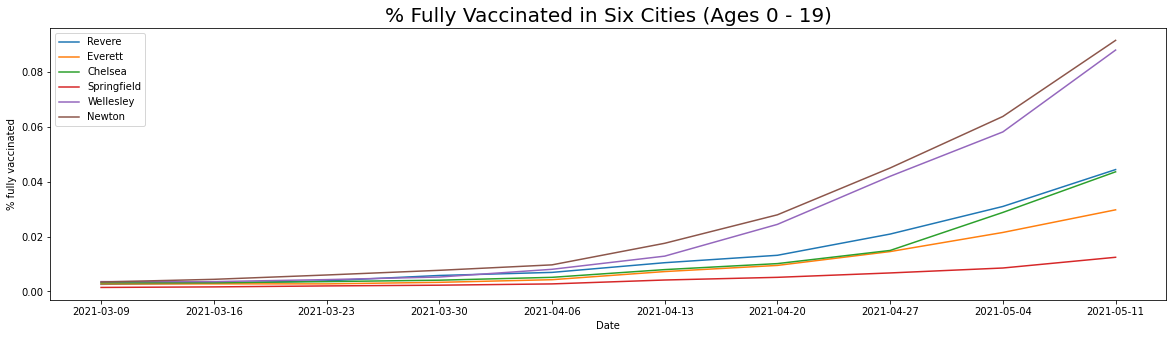

In [43]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age0_Revere["date"],age0_Revere["fully_vaccinated"]/age0_Revere["population"].iat[-1], label='Revere')
plt.plot(age0_Everett["date"],age0_Everett["fully_vaccinated"]/age0_Everett["population"].iat[-1], label='Everett')
plt.plot(age0_Chelsea["date"],age0_Chelsea["fully_vaccinated"]/age0_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age0_Springfield["date"],age0_Springfield["fully_vaccinated"]/age0_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age0_Wellesley["date"],age0_Wellesley["fully_vaccinated"]/age0_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age0_Newton["date"],age0_Newton["fully_vaccinated"]/age0_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 0 - 19)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% fully vaccinated')

plt.legend()
plt.show()

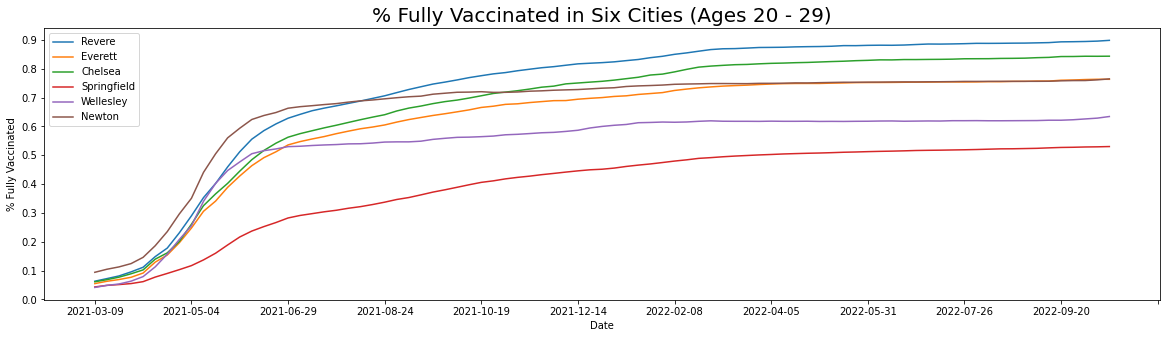

In [44]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age20_Revere["date"],age20_Revere["fully_vaccinated"]/age20_Revere["population"].iat[-1], label='Revere')
plt.plot(age20_Everett["date"],age20_Everett["fully_vaccinated"]/age20_Everett["population"].iat[-1], label='Everett')
plt.plot(age20_Chelsea["date"],age20_Chelsea["fully_vaccinated"]/age20_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age20_Springfield["date"],age20_Springfield["fully_vaccinated"]/age20_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age20_Wellesley["date"],age20_Wellesley["fully_vaccinated"]/age20_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age20_Newton["date"],age20_Newton["fully_vaccinated"]/age20_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 20 - 29)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 90, 8))

plt.legend()
plt.show()

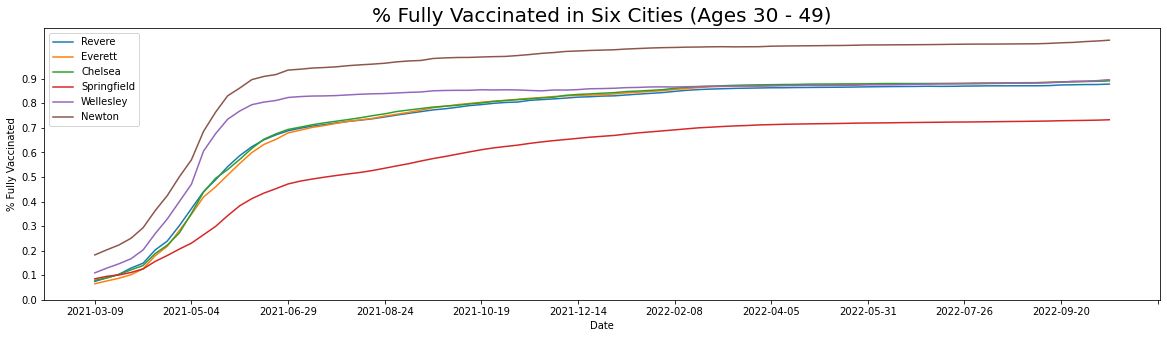

In [45]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age30_Revere["date"],age30_Revere["fully_vaccinated"]/age30_Revere["population"].iat[-1], label='Revere')
plt.plot(age30_Everett["date"],age30_Everett["fully_vaccinated"]/age30_Everett["population"].iat[-1], label='Everett')
plt.plot(age30_Chelsea["date"],age30_Chelsea["fully_vaccinated"]/age30_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age30_Springfield["date"],age30_Springfield["fully_vaccinated"]/age30_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age30_Wellesley["date"],age30_Wellesley["fully_vaccinated"]/age30_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age30_Newton["date"],age30_Newton["fully_vaccinated"]/age30_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 30 - 49)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age20_49Revere.index,age20_49Revere["fully_vaccinated"]/age20_49Revere["population"].iat[-1], label='Revere')
plt.plot(age20_49Everett.index,age20_49Everett["fully_vaccinated"]/age20_49Everett["population"].iat[-1], label='Everett')
plt.plot(age20_49Chelsea.index,age20_49Chelsea["fully_vaccinated"]/age20_49Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age20_49Springfield.index,age20_49Springfield["fully_vaccinated"]/age20_49Springfield["population"].iat[-1], label='Springfield')
plt.plot(age20_49Wellesley.index,age20_49Wellesley["fully_vaccinated"]/age20_49Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age20_49Newton.index,age20_49Newton["fully_vaccinated"]/age20_49Newton["population"].iat[-1], label='Newton')

plt.title('Fully Vaccinated Rate in Six Cities in Age 20 - 49 Range', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated Rate')

plt.xticks(rotation='vertical') 

plt.legend()
plt.show()

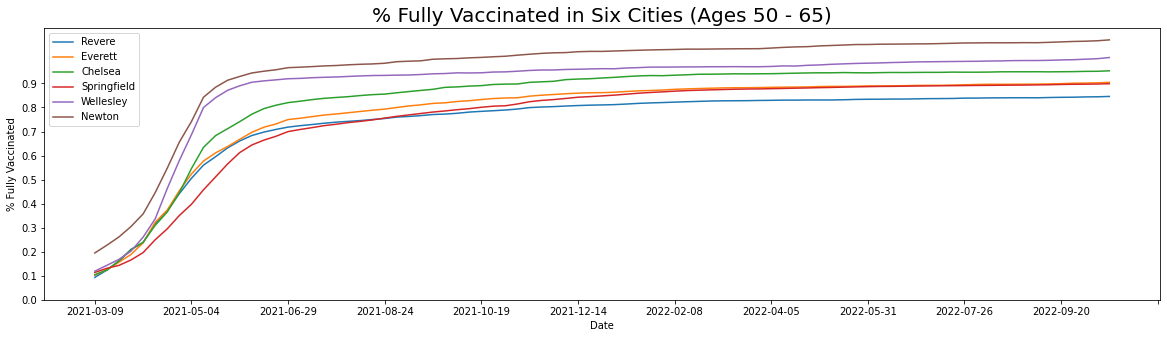

In [46]:

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age50_Revere["date"],age50_Revere["fully_vaccinated"]/age50_Revere["population"].iat[-1], label='Revere')
plt.plot(age50_Everett["date"],age50_Everett["fully_vaccinated"]/age50_Everett["population"].iat[-1], label='Everett')
plt.plot(age50_Chelsea["date"],age50_Chelsea["fully_vaccinated"]/age50_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age50_Springfield["date"],age50_Springfield["fully_vaccinated"]/age50_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age50_Wellesley["date"],age50_Wellesley["fully_vaccinated"]/age50_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age50_Newton["date"],age50_Newton["fully_vaccinated"]/age50_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 50 - 65)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')

plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age65_75Revere.index,age65_75Revere["fully_vaccinated"]/age65_75Revere["population"].iat[-1], label='Revere')
plt.plot(age65_75Everett.index,age65_75Everett["fully_vaccinated"]/age65_75Everett["population"].iat[-1], label='Everett')
plt.plot(age65_75Chelsea.index,age65_75Chelsea["fully_vaccinated"]/age65_75Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age65_75Springfield.index,age65_75Springfield["fully_vaccinated"]/age65_75Springfield["population"].iat[-1], label='Springfield')
plt.plot(age65_75Wellesley.index,age65_75Wellesley["fully_vaccinated"]/age65_75Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age65_75Newton.index,age65_75Newton["fully_vaccinated"]/age65_75Newton["population"].iat[-1], label='Newton')

plt.title('Fully Vaccinated Rate in Six Cities in Age 65 - 75+ Range', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Fully Vaccinated Rate')

plt.xticks(rotation='vertical') 

plt.legend()
plt.show()

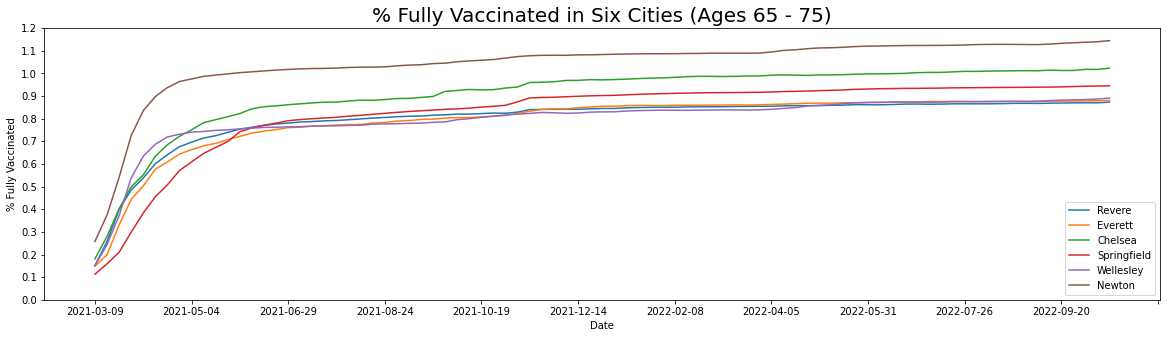

In [48]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age65_Revere["date"],age65_Revere["fully_vaccinated"]/age65_Revere["population"].iat[-1], label='Revere')
plt.plot(age65_Everett["date"],age65_Everett["fully_vaccinated"]/age65_Everett["population"].iat[-1], label='Everett')
plt.plot(age65_Chelsea["date"],age65_Chelsea["fully_vaccinated"]/age65_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age65_Springfield["date"],age65_Springfield["fully_vaccinated"]/age65_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age65_Wellesley["date"],age65_Wellesley["fully_vaccinated"]/age65_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age65_Newton["date"],age65_Newton["fully_vaccinated"]/age65_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 65 - 75)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

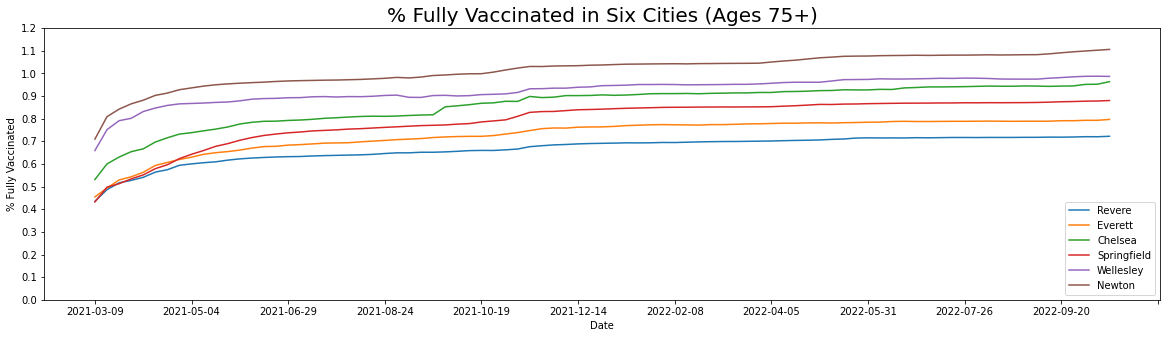

In [50]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age75_Revere["date"],age75_Revere["fully_vaccinated"]/age75_Revere["population"].iat[-1], label='Revere')
plt.plot(age75_Everett["date"],age75_Everett["fully_vaccinated"]/age75_Everett["population"].iat[-1], label='Everett')
plt.plot(age75_Chelsea["date"],age75_Chelsea["fully_vaccinated"]/age75_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age75_Springfield["date"],age75_Springfield["fully_vaccinated"]/age75_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age75_Wellesley["date"],age75_Wellesley["fully_vaccinated"]/age75_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age75_Newton["date"],age75_Newton["fully_vaccinated"]/age75_Newton["population"].iat[-1], label='Newton')

plt.title('% Fully Vaccinated in Six Cities (Ages 75+)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()

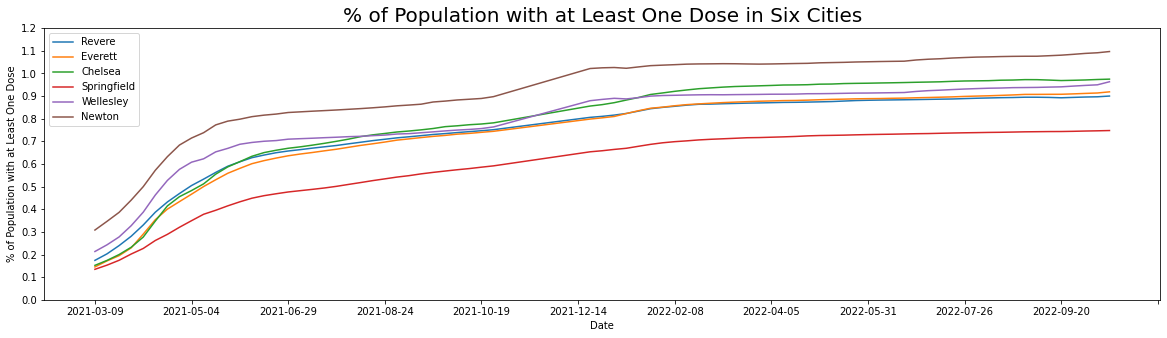

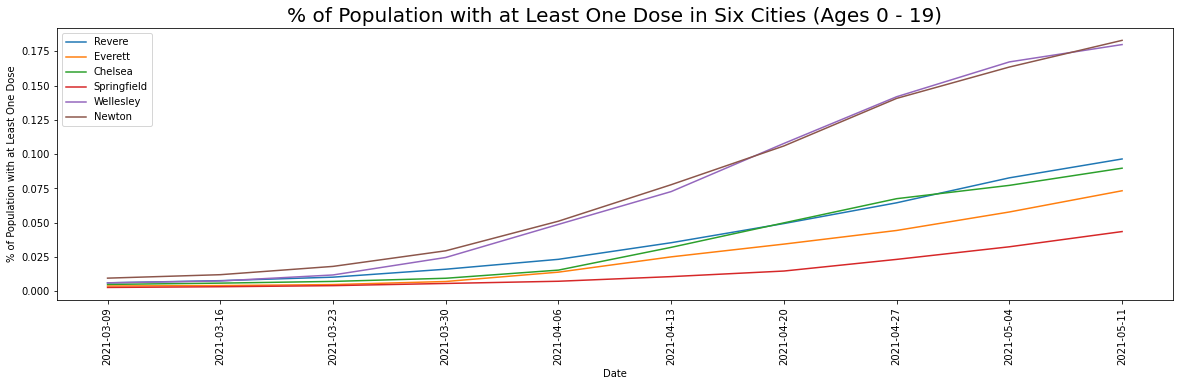

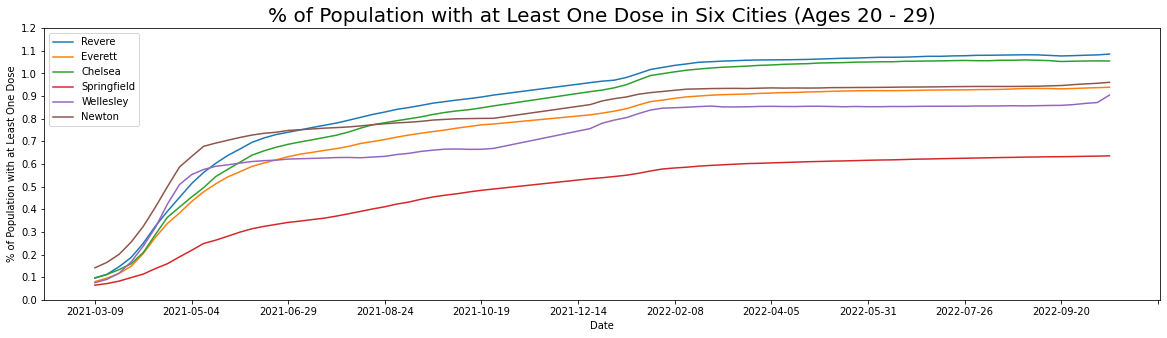

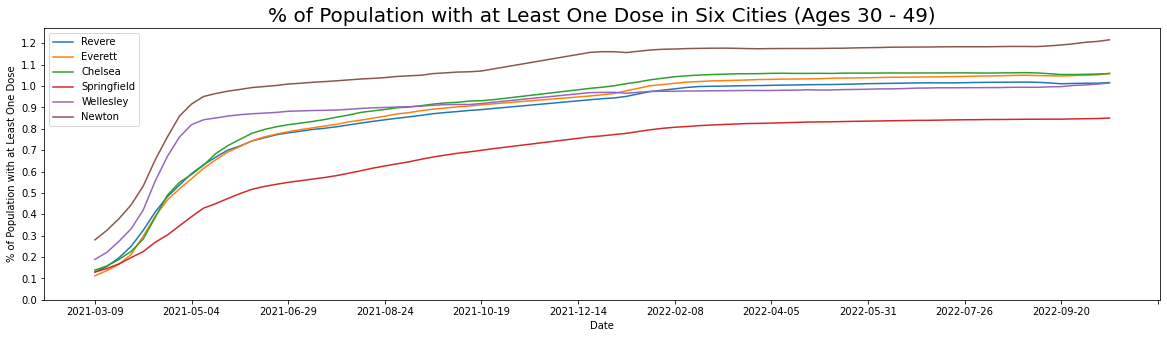

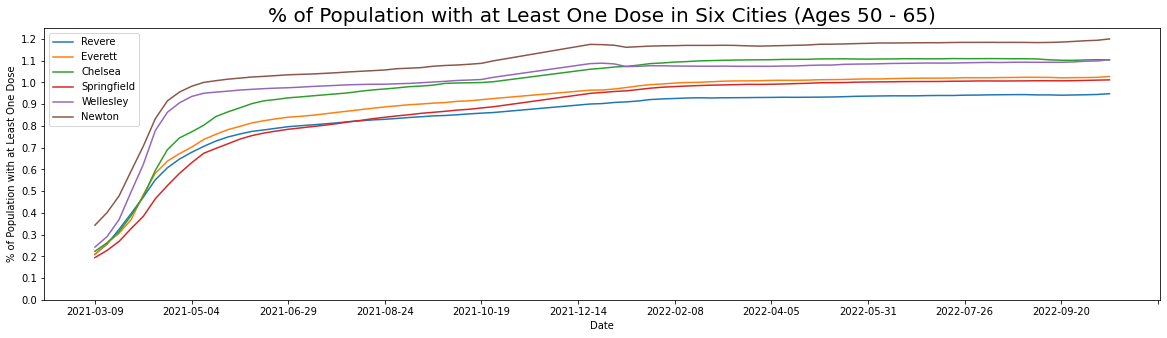

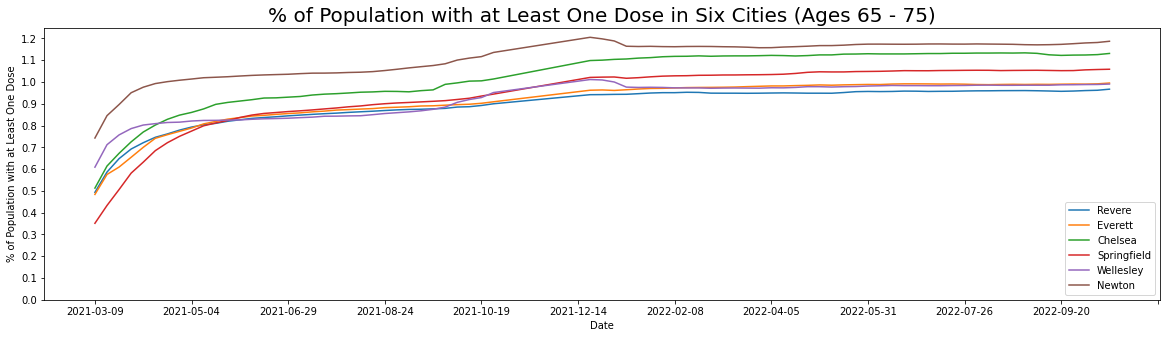

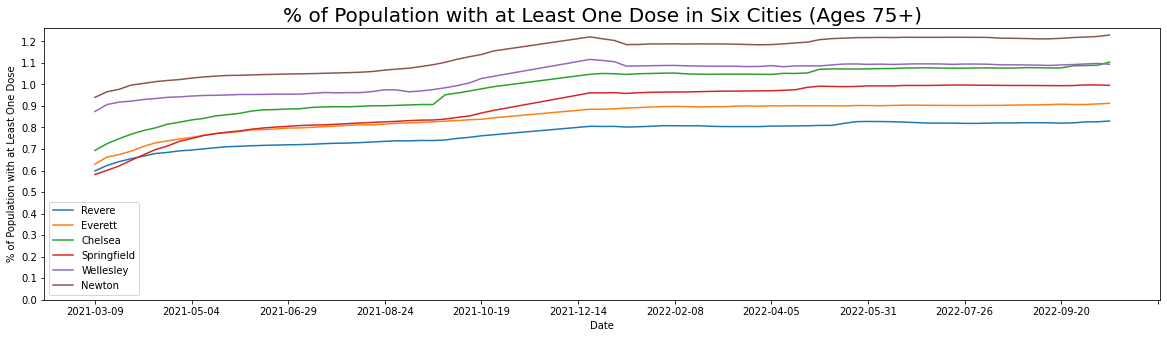

In [107]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)




plt.plot(all_age_Revere["date"],all_age_Revere["atleast_onedose"]/all_age_Revere["population"].iat[-1], label='Revere')
plt.plot(all_age_Everett["date"],all_age_Everett["atleast_onedose"]/all_age_Everett["population"].iat[-1], label='Everett')
plt.plot(all_age_Chelsea["date"],all_age_Chelsea["atleast_onedose"]/all_age_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(all_age_Springfield["date"],all_age_Springfield["atleast_onedose"]/all_age_Springfield["population"].iat[-1], label='Springfield')
plt.plot(all_age_Wellesley["date"],all_age_Wellesley["atleast_onedose"]/all_age_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(all_age_Newton["date"],all_age_Newton["atleast_onedose"]/all_age_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()




f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age0_Revere["date"],age0_Revere["atleast_onedose"]/age0_Revere["population"].iat[-1], label='Revere')
plt.plot(age0_Everett["date"],age0_Everett["atleast_onedose"]/age0_Everett["population"].iat[-1], label='Everett')
plt.plot(age0_Chelsea["date"],age0_Chelsea["atleast_onedose"]/age0_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age0_Springfield["date"],age0_Springfield["atleast_onedose"]/age0_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age0_Wellesley["date"],age0_Wellesley["atleast_onedose"]/age0_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age0_Newton["date"],age0_Newton["atleast_onedose"]/age0_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 0 - 19)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.xticks(rotation='vertical') 

plt.legend()
plt.show()

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age20_Revere["date"],age20_Revere["atleast_onedose"]/age20_Revere["population"].iat[-1], label='Revere')
plt.plot(age20_Everett["date"],age20_Everett["atleast_onedose"]/age20_Everett["population"].iat[-1], label='Everett')
plt.plot(age20_Chelsea["date"],age20_Chelsea["atleast_onedose"]/age20_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age20_Springfield["date"],age20_Springfield["atleast_onedose"]/age20_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age20_Wellesley["date"],age20_Wellesley["atleast_onedose"]/age20_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age20_Newton["date"],age20_Newton["atleast_onedose"]/age20_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 20 - 29)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')
plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))

plt.legend()
plt.show()
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age30_Revere["date"],age30_Revere["atleast_onedose"]/age30_Revere["population"].iat[-1], label='Revere')
plt.plot(age30_Everett["date"],age30_Everett["atleast_onedose"]/age30_Everett["population"].iat[-1], label='Everett')
plt.plot(age30_Chelsea["date"],age30_Chelsea["atleast_onedose"]/age30_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age30_Springfield["date"],age30_Springfield["atleast_onedose"]/age30_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age30_Wellesley["date"],age30_Wellesley["atleast_onedose"]/age30_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age30_Newton["date"],age30_Newton["atleast_onedose"]/age30_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 30 - 49)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')
plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))

plt.legend()
plt.show()


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age50_Revere["date"],age50_Revere["atleast_onedose"]/age50_Revere["population"].iat[-1], label='Revere')
plt.plot(age50_Everett["date"],age50_Everett["atleast_onedose"]/age50_Everett["population"].iat[-1], label='Everett')
plt.plot(age50_Chelsea["date"],age50_Chelsea["atleast_onedose"]/age50_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age50_Springfield["date"],age50_Springfield["atleast_onedose"]/age50_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age50_Wellesley["date"],age50_Wellesley["atleast_onedose"]/age50_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age50_Newton["date"],age50_Newton["atleast_onedose"]/age50_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 50 - 65)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age65_Revere["date"],age65_Revere["atleast_onedose"]/age65_Revere["population"].iat[-1], label='Revere')
plt.plot(age65_Everett["date"],age65_Everett["atleast_onedose"]/age65_Everett["population"].iat[-1], label='Everett')
plt.plot(age65_Chelsea["date"],age65_Chelsea["atleast_onedose"]/age65_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age65_Springfield["date"],age65_Springfield["atleast_onedose"]/age65_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age65_Wellesley["date"],age65_Wellesley["atleast_onedose"]/age65_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age65_Newton["date"],age65_Newton["atleast_onedose"]/9938, label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 65 - 75)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.plot(age75_Revere["date"],age75_Revere["atleast_onedose"]/age75_Revere["population"].iat[-1], label='Revere')
plt.plot(age75_Everett["date"],age75_Everett["atleast_onedose"]/age75_Everett["population"].iat[-1], label='Everett')
plt.plot(age75_Chelsea["date"],age75_Chelsea["atleast_onedose"]/age75_Chelsea["population"].iat[-1], label='Chelsea')
plt.plot(age75_Springfield["date"],age75_Springfield["atleast_onedose"]/age75_Springfield["population"].iat[-1], label='Springfield')
plt.plot(age75_Wellesley["date"],age75_Wellesley["atleast_onedose"]/age75_Wellesley["population"].iat[-1], label='Wellesley')
plt.plot(age75_Newton["date"],age75_Newton["atleast_onedose"]/age75_Newton["population"].iat[-1], label='Newton')

plt.title('% of Population with at Least One Dose in Six Cities (Ages 75+)', fontsize=20)
plt.xlabel('Date')
plt.ylabel('% of Population with at Least One Dose')

plt.yticks(np.arange(0, 1.3, 0.1))
plt.xticks(np.arange(0, 90, 8))
plt.legend()
plt.show()